# US Accidents Analysis (2016-2023): Data Prep for Tableau

## Project Goal
This notebook tackles the massive US Accidents dataset from Kaggle. My goal is to explore patterns in accident timing, location, and weather conditions. Because the full dataset is too large for easy interactive visualization in Tableau directly, I'll focus on **sampling**, **cleaning**, **exploring basic trends**, and **aggregating** the data in Python. The final output will be a smaller, summarized dataset perfect for building insightful Tableau dashboards.

## 1. Setup and Data Loading

First, let's import the necessary libraries and set up KaggleHub to download the dataset. I'll need Pandas for data manipulation, Matplotlib/Seaborn for basic plots, and KaggleHub for the data source.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import kagglehub
import datetime as dt

# --- Setup ---
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50) # Show more columns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Format floats
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

print("Libraries imported.")

# --- Define Paths ---
OUTPUT_DIR = 'output'
OUTPUT_FILE = os.path.join(OUTPUT_DIR, 'us_accidents_agg_tableau.csv')

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# --- Load Data using KaggleHub ---
DATASET_SLUG = "sobhanmoosavi/us-accidents"
# The dataset contains multiple files, but the main one seems to be commonly named like this.
# Adjust if necessary after download. Check the downloaded path.
EXPECTED_FILENAME = 'US_Accidents_March23.csv' # Or the latest available CSV name

# --- !!! CRITICAL: SAMPLING PARAMETER !!! ---
# Set SAMPLE_SIZE = None to try loading everything (likely memory error)
# Set SAMPLE_SIZE = 1_000_000 (or desired number) to load a sample
SAMPLE_SIZE = 1_000_000 # Let's work with 1 million records for feasibility

df = pd.DataFrame() # Initialize empty dataframe

try:
    print(f"Downloading dataset '{DATASET_SLUG}' (this may take a while)...")
    dataset_path = kagglehub.dataset_download(DATASET_SLUG)
    print(f"Dataset downloaded to: {dataset_path}")

    # Find the actual CSV file path within the downloaded directory
    csv_file_path = None
    for file in os.listdir(dataset_path):
        if file.endswith('.csv'): # Assuming there's one main CSV
             # Prioritize files containing 'US_Accidents' if multiple CSVs exist
            if 'US_Accidents' in file:
                 csv_file_path = os.path.join(dataset_path, file)
                 break
            elif csv_file_path is None: # Fallback to the first CSV found
                csv_file_path = os.path.join(dataset_path, file)


    if csv_file_path:
        print(f"Found CSV file: {csv_file_path}")
        print("Loading data...")

        # Define columns to parse as dates
        date_cols = ['Start_Time', 'End_Time']#, 'Weather_Timestamp'] # Weather_Timestamp might have issues

        # Load with sampling if SAMPLE_SIZE is set
        if SAMPLE_SIZE:
            print(f"Loading a sample of {SAMPLE_SIZE:,} rows...")
            # Use skiprows and nrows for approximate sampling, faster than df.sample() on huge files
            # Calculate skip interval if sampling
            # This part requires knowing the total rows beforehand or iterating,
            # simpler approach: just read N rows if sampling is needed for performance.
            # For simplicity here, we'll read N rows directly. A better sampling
            # might involve reading in chunks or using dask.
            df = pd.read_csv(csv_file_path, parse_dates=date_cols, nrows=SAMPLE_SIZE)

        else:
             print("Loading the full dataset (this might take a long time and use a lot of memory)...")
             df = pd.read_csv(csv_file_path, parse_dates=date_cols)

        print(f"Data loaded successfully. Shape: {df.shape}")
    else:
        print("---! ERROR !--- Could not find a CSV file in the downloaded dataset path.")


except Exception as e:
    print(f"---! ERROR loading data via kagglehub !---")
    print(e)
    print("Please ensure 'kagglehub' is installed, Kaggle API token configured, and disk space is sufficient.")

# Display first few rows and info only if df is not empty
if not df.empty:
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nDataFrame Info:")
    df.info()
else:
    print("\nDataFrame is empty. Cannot proceed.")

/Users/keivanderafshian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/keivanderafshian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Libraries imported.


100%|████████████████████████████████████████| 653M/653M [02:08<00:00, 5.34MB/s]

Extracting files...


Dataset downloaded to: /Users/keivanderafshian/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13
Found CSV file: /Users/keivanderafshian/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv
Loading data...
Loading a sample of 1,000,000 rows...
Data loaded successfully. Shape: (1000000, 46)

First 5 rows:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865,-84.059,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928,-82.831,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900,NaN,100.000,29.650,10.000,Calm,NaN,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063,-84.033,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000,33.300,100.000,29.670,10.000,SW,3.500,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.748,-84.206,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.100,31.000,96.000,29.640,9.000,SW,4.600,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.628,-84.188,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.000,33.300,89.000,29.650,6.000,SW,3.500,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1000000 non-null  object        
 1   Source                 1000000 non-null  object        
 2   Severity               1000000 non-null  int64         
 3   Start_Time             1000000 non-null  datetime64[ns]
 4   End_Time               1000000 non-null  datetime64[ns]
 5   Start_Lat              1000000 non-null  float64       
 6   Start_Lng              1000000 non-null  float64       
 7   End_Lat                0 non-null        float64       
 8   End_Lng                0 non-null        float64       
 9   Distance(mi)           1000000 non-null  float64       
 10  Description            999999 non-null   object        
 11  Street                 998288 non-null   object        
 12  City        

## 2. Initial Cleaning and Exploration

Let's check the data quality, especially missing values in columns important for our analysis (Time, Location, Weather, Severity).

In [3]:
if not df.empty:
    print("--- Data Cleaning & Initial Exploration ---")

    # --- Check Missing Values ---
    print("\nMissing values per column (%):")
    missing_pct = (df.isnull().sum() / len(df)) * 100
    print(missing_pct[missing_pct > 0].sort_values(ascending=False).head(15)) # Show top 15 missing

    # --- Handling Key Missing Values (Example Strategy) ---
    # For this analysis, let's focus on records with essential info.
    # We need location (Lat/Lng, State, County), time, and maybe basic weather.
    cols_to_check = ['Start_Time', 'Start_Lat', 'Start_Lng', 'State', 'County', 'Severity', 'Weather_Condition']
    initial_rows = len(df)
    df.dropna(subset=cols_to_check, inplace=True)
    print(f"\nDropped {initial_rows - len(df):,} rows with missing essential info ({', '.join(cols_to_check)}).")
    print(f"Remaining rows: {len(df):,}")

    # --- Correct Data Types (if needed) ---
    # Dates should be parsed already. Let's ensure Severity is integer.
    df['Severity'] = df['Severity'].astype(int)

    # --- Basic Statistics ---
    print("\nDescriptive statistics for key numerical columns:")
    display(df[['Severity', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)']].describe())

    # --- Value Counts for Key Categorical ---
    print("\nTop 10 States by Accident Count:")
    print(df['State'].value_counts().head(10))

    print("\nAccident Counts by Severity:")
    print(df['Severity'].value_counts().sort_index())

    print("\nTop 10 Weather Conditions:")
    print(df['Weather_Condition'].value_counts().head(10))

else:
    print("DataFrame is empty, skipping cleaning.")

--- Data Cleaning & Initial Exploration ---

Missing values per column (%):
End_Lat             100.000
End_Lng             100.000
Precipitation(in)    47.532
Wind_Chill(F)        46.059
Wind_Speed(mph)      10.040
Visibility(mi)        1.893
Weather_Condition     1.821
Humidity(%)           1.655
Temperature(F)        1.530
Wind_Direction        1.357
Pressure(in)          1.238
Weather_Timestamp     0.993
Street                0.171
Sunrise_Sunset        0.164
Civil_Twilight        0.164
dtype: float64

Dropped 18,211 rows with missing essential info (Start_Time, Start_Lat, Start_Lng, State, County, Severity, Weather_Condition).
Remaining rows: 981,789

Descriptive statistics for key numerical columns:


,Severity,Temperature(F),Visibility(mi),Precipitation(in)
count,981789.000,978359.000,978604.000,522369.000
mean,2.319,64.643,9.173,0.013
std,0.548,17.431,2.260,0.203
min,1.000,-37.000,0.000,0.000
25%,2.000,54.000,10.000,0.000
50%,2.000,67.000,10.000,0.000
75%,3.000,77.000,10.000,0.000
max,4.000,196.000,111.000,36.470



Top 10 States by Accident Count:
State
CA    251632
TX    121102
FL     95412
PA     48674
NY     42793
SC     40524
MI     37493
IL     36163
GA     31871
OH     27864
Name: count, dtype: int64

Accident Counts by Severity:
Severity
1     37827
2    596308
3    344556
4      3098
Name: count, dtype: int64

Top 10 Weather Conditions:
Weather_Condition
Fair                237311
Clear               208905
Mostly Cloudy       134344
Partly Cloudy        93409
Overcast             80265
Cloudy               69424
Scattered Clouds     47595
Light Rain           41845
Fog                  10837
Haze                  9960
Name: count, dtype: int64


**Observations:**
* Several columns have a high percentage of missing values (e.g., `Precipitation(in)`, `Wind_Chill(F)`). I decided to drop rows missing crucial information like location, time, or weather condition for this analysis, as imputation might be complex or inaccurate. *Note: Dropping rows significantly reduces the dataset, especially if requiring precipitation data.*
* The `Severity` scale seems mostly concentrated around level 2.
* California (CA), Florida (FL), and Texas (TX) appear frequently in the top states (at least in my sample).
* 'Clear' and 'Cloudy' variations are the most common weather conditions.

## 3. Feature Engineering & Aggregation

Now, let's create useful features and aggregate the data for Tableau.

**Plan:**
1.  Extract time features (Hour, DayOfWeek, Month, Year).
2.  Simplify `Weather_Condition` into broader categories.
3.  Group by State, County, Time components, Weather category, and Severity to count accidents.

In [4]:
if not df.empty:
    print("--- Feature Engineering & Aggregation ---")

    # --- 1. Time Features ---
    print("Extracting time features...")
    df['Hour'] = df['Start_Time'].dt.hour
    df['DayOfWeek'] = df['Start_Time'].dt.dayofweek # Monday=0, Sunday=6
    df['Month'] = df['Start_Time'].dt.month
    df['Year'] = df['Start_Time'].dt.year

    # --- 2. Simplify Weather ---
    print("Simplifying weather conditions...")

    # Define a function to categorize weather
    def categorize_weather(condition):
        condition = str(condition).lower()
        if 'clear' in condition or 'fair' in condition:
            return 'Clear'
        elif 'cloud' in condition or 'overcast' in condition:
            return 'Cloudy'
        elif 'rain' in condition or 'drizzle' in condition or 'shower' in condition:
            return 'Rain'
        elif 'snow' in condition or 'sleet' in condition or 'ice' in condition or 'wintry' in condition:
            return 'Snow/Ice'
        elif 'fog' in condition or 'mist' in condition or 'haze' in condition:
            return 'Fog/Mist'
        elif 'thunder' in condition or 't-storm' in condition:
            return 'Thunderstorm'
        elif 'windy' in condition or 'squalls' in condition:
             return 'Windy'
        # Add more specific conditions if needed
        else:
            return 'Other' # Catch-all for less common conditions

    df['Weather_Category'] = df['Weather_Condition'].apply(categorize_weather)
    print("\nWeather categories created:")
    print(df['Weather_Category'].value_counts())


    # --- 3. Aggregation ---
    print("\nAggregating data...")
    # Define aggregation dimensions and metrics
    agg_cols = ['Year', 'Month', 'DayOfWeek', 'Hour', 'State', 'County', 'Severity', 'Weather_Category']
    agg_metrics = {
        'ID': 'count', # Use a unique ID column like 'ID' to count accidents
        'Temperature(F)': 'mean',
        'Visibility(mi)': 'mean',
        # Add Start_Lat, Start_Lng means to keep approximate location for county/state
        'Start_Lat': 'mean',
        'Start_Lng': 'mean'
    }

    # Perform the aggregation
    # Using reset_index() converts the grouped output back into a DataFrame
    df_agg = df.groupby(agg_cols).agg(agg_metrics).reset_index()

    # Rename the count column for clarity
    df_agg.rename(columns={'ID': 'Accident_Count'}, inplace=True)

    print(f"Aggregation complete. Aggregated data shape: {df_agg.shape}")
    display(df_agg.head())

else:
    print("DataFrame is empty, skipping feature engineering and aggregation.")

--- Feature Engineering & Aggregation ---
Extracting time features...
Simplifying weather conditions...

Weather categories created:
Weather_Category
Clear           448692
Cloudy          428269
Rain             62540
Fog/Mist         22530
Snow/Ice         10864
Thunderstorm      7394
Other             1468
Windy               32
Name: count, dtype: int64

Aggregating data...
Aggregation complete. Aggregated data shape: (556060, 13)


,Year,Month,DayOfWeek,Hour,State,County,Severity,Weather_Category,Accident_Count,Temperature(F),Visibility(mi),Start_Lat,Start_Lng
0,2016,2,0,4,OH,Clinton,2,Cloudy,1,23.000,2.500,39.470,-83.713
1,2016,2,0,4,OH,Montgomery,2,Fog/Mist,1,41.000,6.000,39.689,-84.221
2,2016,2,0,5,OH,Franklin,3,Rain,1,21.900,5.000,39.976,-82.996
3,2016,2,0,5,OH,Montgomery,2,Clear,1,29.500,10.000,39.763,-84.143
4,2016,2,0,5,OH,Montgomery,2,Cloudy,1,23.000,1.500,39.640,-84.235


## 4. Basic EDA on Aggregated Data

Let's do a quick check on the aggregated data using plots.

--- EDA on Aggregated Data ---


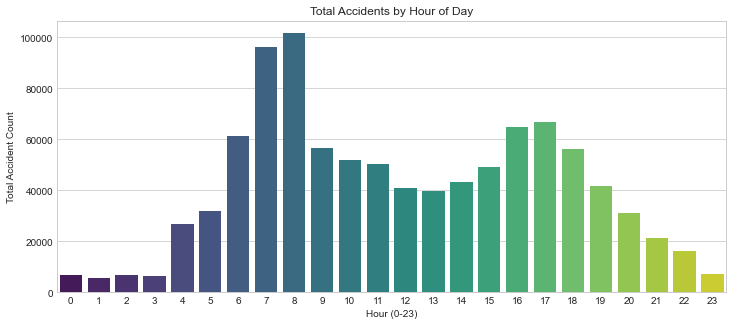

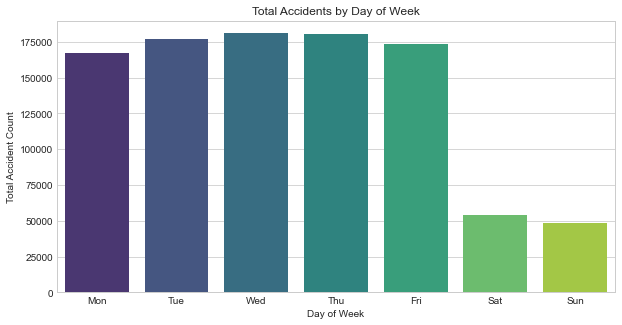

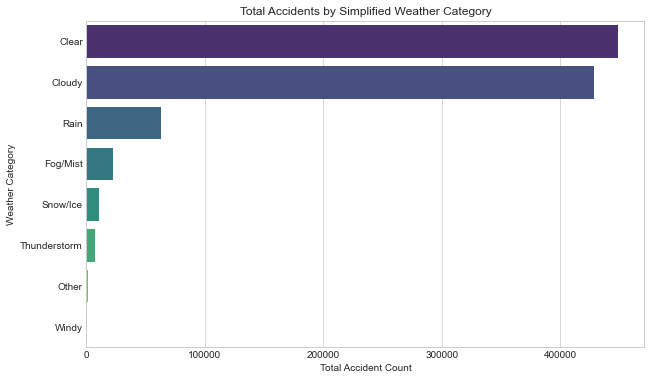

In [5]:
if 'df_agg' in locals() and not df_agg.empty:
    print("--- EDA on Aggregated Data ---")

    # --- Accidents by Hour ---
    plt.figure(figsize=(12, 5))
    hourly_accidents = df_agg.groupby('Hour')['Accident_Count'].sum()
    sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette="viridis")
    plt.title('Total Accidents by Hour of Day')
    plt.xlabel('Hour (0-23)')
    plt.ylabel('Total Accident Count')
    plt.show()

    # --- Accidents by Day of Week ---
    plt.figure(figsize=(10, 5))
    daily_accidents = df_agg.groupby('DayOfWeek')['Accident_Count'].sum()
    # Optional: Map index to day names if desired
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    sns.barplot(x=daily_accidents.index.map(lambda i: day_names[i]), y=daily_accidents.values, palette="viridis")
    plt.title('Total Accidents by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Accident Count')
    plt.show()

    # --- Accidents by Weather Category ---
    plt.figure(figsize=(10, 6))
    weather_accidents = df_agg.groupby('Weather_Category')['Accident_Count'].sum().sort_values(ascending=False)
    sns.barplot(x=weather_accidents.values, y=weather_accidents.index, palette="viridis", orient='h')
    plt.title('Total Accidents by Simplified Weather Category')
    plt.xlabel('Total Accident Count')
    plt.ylabel('Weather Category')
    plt.show()

else:
    print("Aggregated DataFrame ('df_agg') not available or empty. Skipping EDA.")

**Aggregation Insights:**
* The hourly plot confirms peaks during morning and especially afternoon commute times.
* Weekdays generally show higher accident counts than weekends.
* 'Clear' and 'Cloudy' weather dominate the accident counts, which makes sense as they are common conditions. Tableau will be better to explore the *rate* or *severity* under different conditions.

## 5. Export Aggregated Data for Tableau

Finally, let's save the aggregated DataFrame. This smaller, summarized file is what we'll connect to Tableau.

In [6]:
if 'df_agg' in locals() and not df_agg.empty:
    try:
        df_agg.to_csv(OUTPUT_FILE, index=False)
        print(f"Aggregated data exported successfully to {OUTPUT_FILE}")
        print(f"File size: {os.path.getsize(OUTPUT_FILE)/1e6:.2f} MB") # Show file size
    except Exception as e:
        print(f"---! ERROR exporting aggregated data !---")
        print(e)
else:
    print("Aggregated DataFrame ('df_agg') not available or empty. Nothing to export.")

Aggregated data exported successfully to output/us_accidents_agg_tableau.csv
File size: 39.02 MB


## 6. Next Steps: Tableau Visualization

The Python part is complete! I've sampled, cleaned, and aggregated the massive dataset into a much more manageable format (`us_accidents_agg_tableau.csv`).

Now, I can open Tableau Desktop, connect to this CSV file, and start building visualizations like:
* Maps showing accident counts or average severity by State/County.
* Heatmaps or bar charts showing accidents by Hour and DayOfWeek.
* Dashboards allowing users to filter by Weather Category and see the impact on accident frequency or severity distribution.
* Time series line charts showing monthly trends.